# 1 Initial Settings


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2 Importing Data

In [27]:
df = pd.read_csv("Mens_Boston_Marathon_Winners.csv")

# 3 Handling Data

## 3.1 Removing Empty Values

In [28]:
df_cleaned = df.dropna()

## 3.2 Unpivoting Data

In [29]:
df_longer = df_cleaned.melt(
    id_vars="Country",
    value_vars="Distance (KM)",
    var_name="Distances"
)

## 3.3 Pivoting Data

In [30]:
df_pivot = df_longer.pivot_table(
    index="Country",
    columns="Distances",
    aggfunc="sum"
).sort_values(by=('value', 'Distance (KM)'), ascending=True)

# 4 Settings For Plotting A Horizontal Bar Chart

In [31]:
n_items = len(df_pivot.index)
y_pos = np.arange(n_items)
colors = plt.cm.Set2.colors
bar_height = 0.8

# 5 Plotting A Horizontal Bar Chart

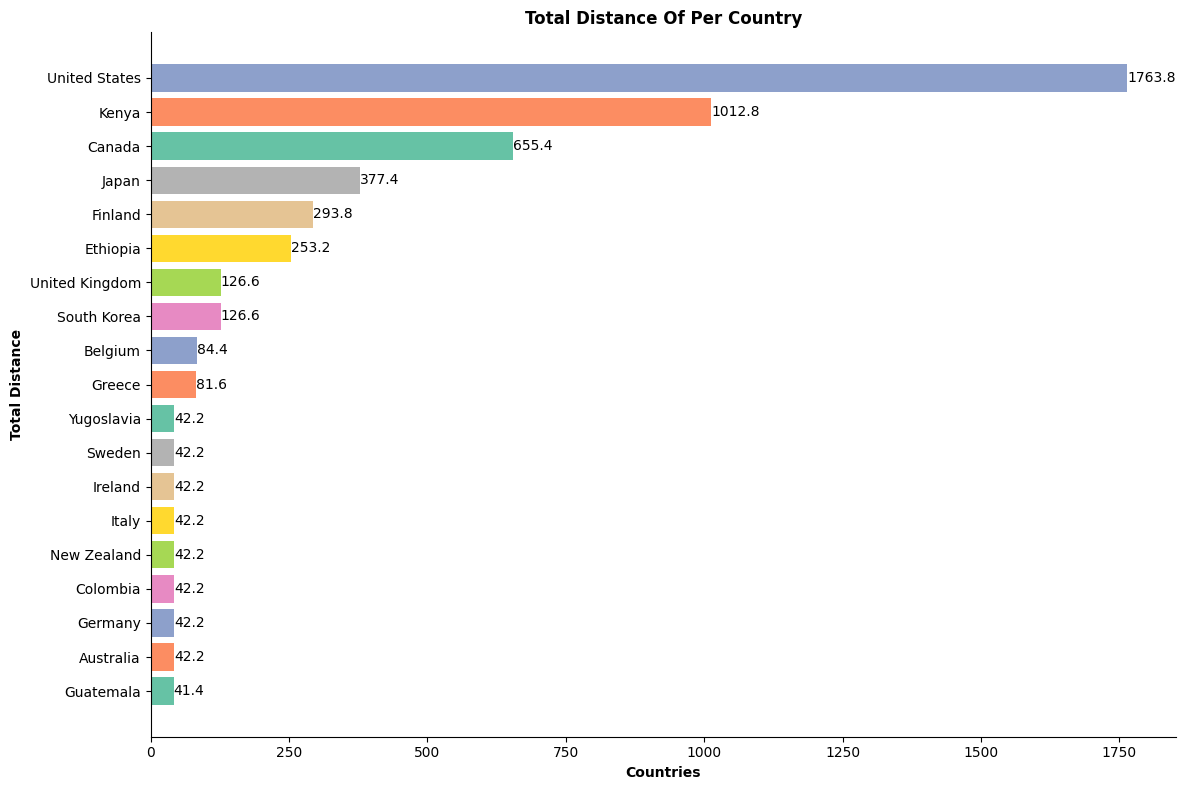

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.barh(y_pos, df_pivot['value']['Distance (KM)'], bar_height, color=colors)

ax.set_yticks(y_pos)
ax.set_yticklabels(df_pivot.index)
ax.set_xlabel("Countries", fontweight="bold")
ax.set_ylabel("Total Distance", fontweight="bold")
ax.set_title("Total Distance Of Per Country", fontweight="bold")
ax.spines[['top', 'right']].set_visible(False)
ax.bar_label(bars)

plt.tight_layout()
plt.show()